# SQL–Python Analytics Pipeline (Uber Data)

## Project Overview
This project demonstrates an end-to-end analytics workflow by integrating **SQL Server** with **Python**. Operational data stored in a relational database is queried using SQL, extracted into Python using a database connection, and analyzed using pandas to generate business insights and visualizations.

The objective of this project is to showcase real-world analyst skills where SQL is used for data extraction and aggregation, while Python is used for analysis, visualization, and reporting.

---

## Objectives
- Connect Python to a SQL Server database
- Execute SQL queries directly from Python
- Load query results into pandas DataFrames
- Perform analytical computations and KPI analysis
- Visualize operational trends
- Export analytical summaries for reporting

---

## Data Source
- Uber operational dataset stored in **SQL Server (UberDB)**
- Primary table: `UberData`
- Supporting views:
  - `vw_AvgFareByCity`
  - `vw_DriverPerformance`

**Note:**  
Raw CSV or database files are not included in this repository. The focus of this project is on analytics and integration rather than data distribution.

---

## Tools & Technologies
- Python
- pandas
- matplotlib
- seaborn
- pyodbc
- MS SQL Server
- SQL Server Management Studio (SSMS)

---

## Workflow

### 1. SQL Server Connection
- Established a connection between Python and SQL Server using `pyodbc`
- Verified database connectivity and query execution

---

### 2. Data Extraction from SQL
The following business-focused queries were executed from Python:
- City-wise total revenue
- Hourly ride counts and cancellations
- Driver-level performance metrics

SQL was used to perform aggregations efficiently before transferring results to Python.

---

### 3. Data Analysis in Python
Using pandas:
- Calculated revenue contribution by city
- Analyzed cancellation patterns by hour
- Ranked drivers based on total earnings
- Derived key operational KPIs

---

### 4. Data Visualization
Visualizations were created to support insights:
- Bar chart: Revenue by city
- Bar/line chart: Cancellations by hour
- Bar chart: Top drivers by total earnings

All visualizations focus on clarity and business relevance.

---

### 5. Exporting Results
Final analytical summaries were exported to CSV files for reporting and downstream use:
- City revenue summary
- Driver performance summary

---

## Key Insights
- Revenue distribution varies significantly across cities
- Specific time windows show higher cancellation rates
- A small group of drivers contributes a large share of total earnings

These insights can support operational optimization and strategic decision-making.

---

## Outcome
This project demonstrates the ability to:
- Integrate SQL Server with Python
- Use the right tool for the right task (SQL for extraction, Python for analysis)
- Build a reproducible, real-world analytics pipeline

The workflow closely mirrors how data analysts operate in professional environments.


In [7]:
# Data handling
import pandas as pd
import numpy as np

# Database connectivity
import pyodbc

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [8]:


# SQL Server connection parameters (from SSMS)
server = 'DESKTOP-CLBHJ2E\\MSSQL'
database = 'UberDB'
driver = '{ODBC Driver 17 for SQL Server}'

# Create connection
conn = pyodbc.connect(
    f"DRIVER={driver};"
    f"SERVER={server};"
    f"DATABASE={database};"
    "Trusted_Connection=yes;"
)

print("Connection to SQL Server successful")


Connection to SQL Server successful


In [9]:
# Data handling
import pandas as pd
import numpy as np

# Database connectivity
import pyodbc

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [10]:
# SQL query: City-wise total revenue
query_city_revenue = """
SELECT 
    city_name,
    SUM(fare_amount) AS total_revenue
FROM UberData
GROUP BY city_name
ORDER BY total_revenue DESC;
"""

# Execute query and load into pandas DataFrame
df_city_revenue = pd.read_sql(query_city_revenue, conn)

df_city_revenue.head()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10876\2862445948.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_city_revenue = pd.read_sql(query_city_revenue, conn)


,city_name,total_revenue


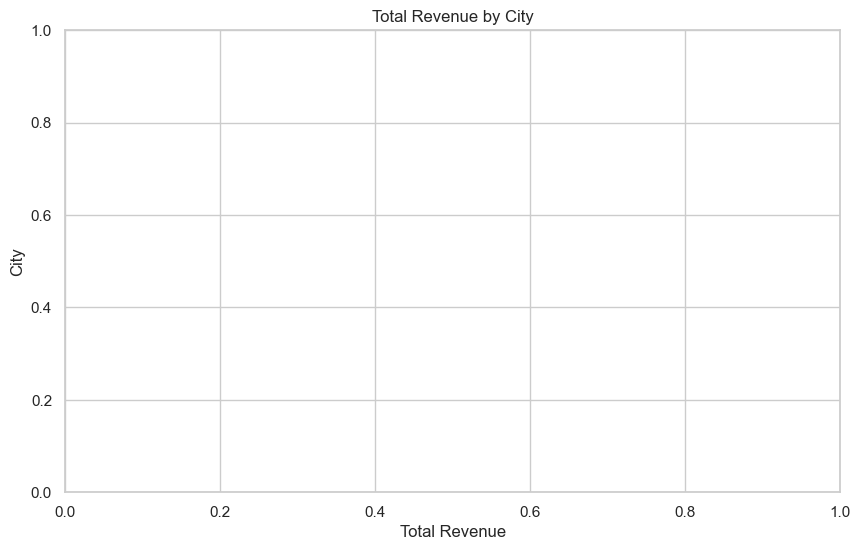

In [11]:
# Bar plot for revenue by city
sns.barplot(
    data=df_city_revenue,
    x="total_revenue",
    y="city_name",
    palette="viridis"
)

plt.title("Total Revenue by City")
plt.xlabel("Total Revenue")
plt.ylabel("City")
plt.show()


In [12]:
# SQL query: Ride cancellations by hour
query_cancellation_hour = """
SELECT 
    DATEPART(HOUR, ride_time) AS ride_hour,
    COUNT(*) AS total_rides,
    SUM(CASE WHEN ride_status = 'Cancelled' THEN 1 ELSE 0 END) AS cancelled_rides
FROM UberData
GROUP BY DATEPART(HOUR, ride_time)
ORDER BY ride_hour;
"""

df_cancellation_hour = pd.read_sql(query_cancellation_hour, conn)

# Calculate cancellation percentage
df_cancellation_hour["cancellation_rate"] = (
    df_cancellation_hour["cancelled_rides"] /
    df_cancellation_hour["total_rides"]
) * 100

df_cancellation_hour.head()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10876\648509982.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_cancellation_hour = pd.read_sql(query_cancellation_hour, conn)


,ride_hour,total_rides,cancelled_rides,cancellation_rate


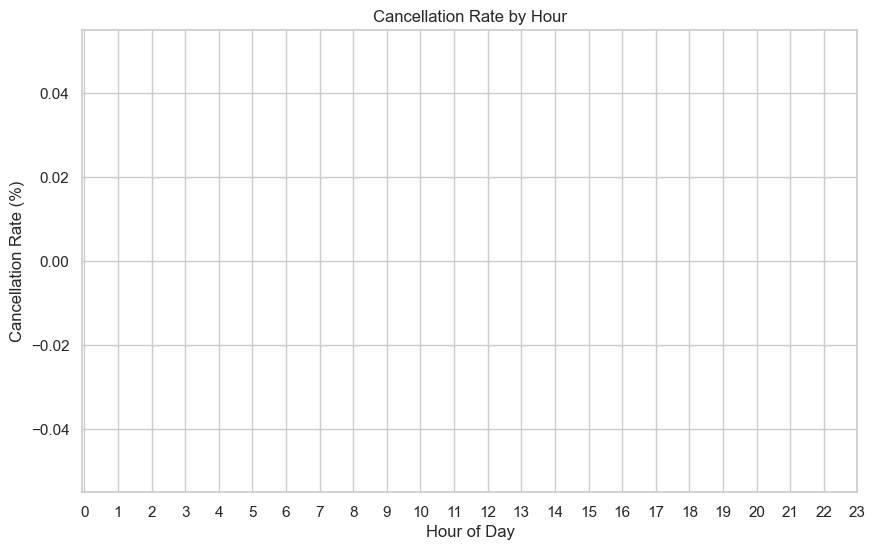

In [13]:
# Line plot for cancellation rate by hour
sns.lineplot(
    data=df_cancellation_hour,
    x="ride_hour",
    y="cancellation_rate",
    marker="o"
)

plt.title("Cancellation Rate by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Cancellation Rate (%)")
plt.xticks(range(0, 24))
plt.show()


In [14]:
# SQL query using pre-built SQL view
query_driver_performance = """
SELECT *
FROM vw_DriverPerformance
ORDER BY total_earnings DESC;
"""

df_driver_perf = pd.read_sql(query_driver_performance, conn)

df_driver_perf.head()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10876\328444060.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_driver_perf = pd.read_sql(query_driver_performance, conn)


,driver_id,driver_name,total_rides,avg_rating,total_earnings


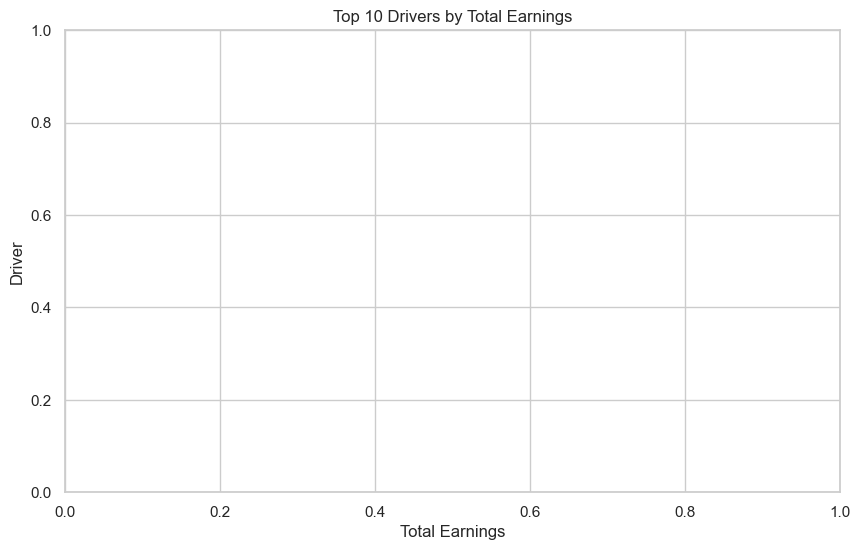

In [15]:
# Select top 10 drivers
top_drivers = df_driver_perf.head(10)

sns.barplot(
    data=top_drivers,
    x="total_earnings",
    y="driver_name",
    palette="coolwarm"
)

plt.title("Top 10 Drivers by Total Earnings")
plt.xlabel("Total Earnings")
plt.ylabel("Driver")
plt.show()


In [16]:
# Export results to CSV for reporting
df_city_revenue.to_csv("city_revenue_summary.csv", index=False)
df_driver_perf.to_csv("driver_performance_summary.csv", index=False)

print("Summary files exported successfully")


Summary files exported successfully


In [17]:
# Close SQL connection
conn.close()
print("SQL Server connection closed")


SQL Server connection closed
